Data Description

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data=pd.read_csv('/content/transferIQ_cleaned_for_XGBoost.csv')
print(data.shape)
data.head()

(450, 505)


,player_id,matches_played,minutes_played,passes,shots,goals,assists,tackles,interceptions,yellow_cards,...,sentiment_classification_Neutral,sentiment_classification_Positive,sentiment_classification_Very Negative,sentiment_classification_Very Positive,current_injury_status_Minor,current_injury_status_Out,current_injury_status_Recovering,injury_prone_body_parts_Hamstring,injury_prone_body_parts_Knee,injury_prone_body_parts_Shoulder
0,415,40,3480,2764,17,7,0,10,24,3,...,False,False,False,True,False,True,False,True,False,False
1,69,40,3240,1965,6,4,1,36,23,1,...,False,False,True,False,True,False,False,False,True,False
2,387,40,3360,4144,9,0,7,7,30,3,...,False,False,True,False,True,False,False,False,False,False
3,202,40,2440,2686,11,6,2,34,24,5,...,False,False,True,False,False,True,False,False,False,True
4,250,40,3000,3043,8,7,5,7,16,3,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
X = data.drop("market_value_millions", axis=1)
y = data["market_value_millions"]

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=18,
    random_state=42
)

In [ ]:
lgbm = LGBMRegressor(
    n_estimators=400,
    learning_rate=0.05,
    random_state=42
)

In [ ]:
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2398
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 54
[LightGBM] [Info] Start training from score 16.596303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(learning_rate=0.05, n_estimators=400, random_state=42)

In [ ]:
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)
lgbm_pred = lgbm.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R2  :", r2_score(y_true, y_pred))

In [ ]:
evaluate(y_test, xgb_pred, "XGBoost")
evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, lgbm_pred, "LightGBM")


XGBoost
RMSE: 1.9660147156659493
MAE : 1.5172408769508883
R2  : 0.9687523064471322

Random Forest
RMSE: 1.8310391838688016
MAE : 1.4599038129213253
R2  : 0.9728956051848925

LightGBM
RMSE: 2.5136377491967865
MAE : 1.7764967781091336
R2  : 0.9489201259014125


In [ ]:
ensemble_pred = (xgb_pred + rf_pred + lgbm_pred) / 3

evaluate(y_test, ensemble_pred, "Ensemble Model")


Ensemble Model
RMSE: 1.9246123223116618
MAE : 1.4388938709496244
R2  : 0.9700545418145413


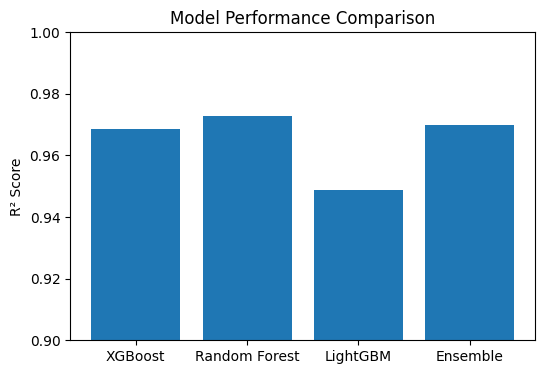

In [ ]:
models = ["XGBoost", "Random Forest", "LightGBM", "Ensemble"]
r2_scores = [
    r2_score(y_test, xgb_pred),
    r2_score(y_test, rf_pred),
    r2_score(y_test, lgbm_pred),
    r2_score(y_test, ensemble_pred)
]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0.9,1.0)
plt.show()

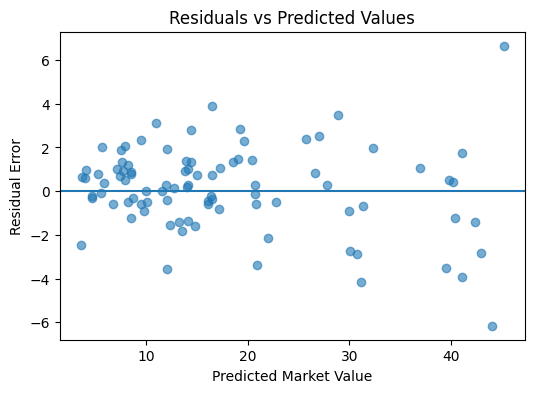

In [ ]:
residuals = y_test - ensemble_pred

plt.figure(figsize=(6,4))
plt.scatter(ensemble_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicted Market Value")
plt.ylabel("Residual Error")
plt.title("Residuals vs Predicted Values")
plt.show()

In [ ]:
results = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": ensemble_pred
})

results.head()

,Actual_Value,Predicted_Value
0,37.984472,36.940074
1,40.641061,40.203870
2,6.223250,5.853487
3,4.586060,3.991078
4,37.878027,44.039563


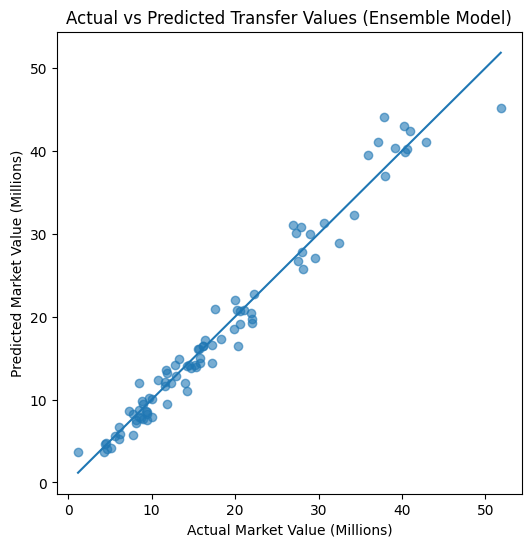

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, ensemble_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Market Value (Millions)")
plt.ylabel("Predicted Market Value (Millions)")
plt.title("Actual vs Predicted Transfer Values (Ensemble Model)")
plt.show()